In [1]:
from femtoPy.preamble import *
import femtoPy.diffusion as diff
import time as time

%matplotlib inline

34.34405279159546


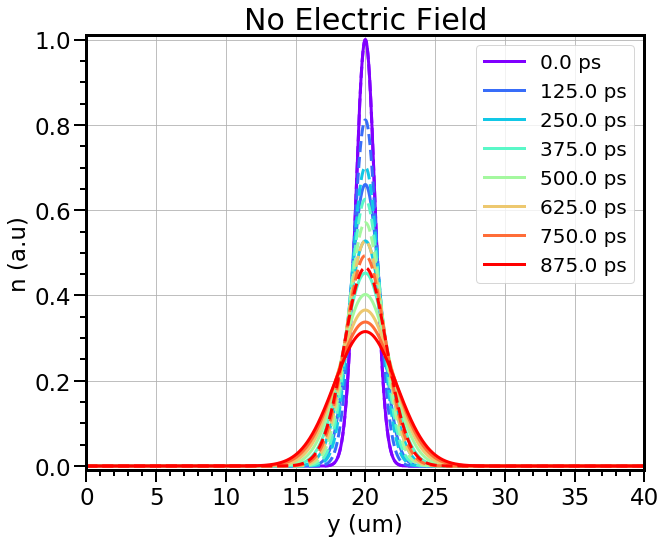

In [10]:
def update(dist,E):
    dist.prep()
    dist.dif()
    dist.boundary()
#     dist.eField(E)
    dist.step()

    return

'Grid Parameters'
dt=.05
dy=.01
y_min=0
y_max=40
t_min=0
t_max=1000

'Material Parameters'
s=0
ue=.1
uh=.04
T=np.zeros(np.arange(t_min,t_max+dt,dt).size)+300
e=1.6e-19
A=0


def exp(x,alpha):
    y=10*np.exp(-x*alpha)
    return y

def d0(x):
    return np.exp(-(x-20)**2/1)
y=np.arange(y_min,y_max+dy,dy)
D0=d0(y)

grid=diff.grid.Grid(dt=dt,dy=dy,y_min=y_min,y_max=y_max,t_min=t_min,t_max=t_max)
e1=diff.distribution.Distribution(grid=grid,d0=D0,s=s,u=ue,A=A,q=-e,T=T)
h1=diff.distribution.Distribution(grid=grid,d0=D0,s=s,u=uh,A=A,q=e,T=T)
E1=diff.poisson.Field(grid=grid,E0=np.asmatrix(np.zeros(grid.y.size)).T)

t0=time.time()
for i in range(0,grid.t.size-1):
    E1.solveGauss(e1,h1)
    E1.field[:,i]=E1.field[:,i]*1e-2
    update(e1,E1)
    update(h1,E1)

print(time.time()-t0)
        
fig,ax=plt.subplots(figsize=(10,8))
ax.set_title('No Electric Field')
ax.set_xlabel('y (um)')
ax.set_ylabel('n (a.u)')

N=np.arange(0,20000,2500)
color=iter(plt.cm.rainbow(np.linspace(0,1,N.size)))
for i in N:
    c=next(color)
    ax.plot(e1.grid.y,e1.density[:,i],label=str(grid.t[0,i])+' ps',color=c)
    ax.plot(h1.grid.y,h1.density[:,i],linestyle='--',color=c)
ax.legend()

plt.show()

(20001,)


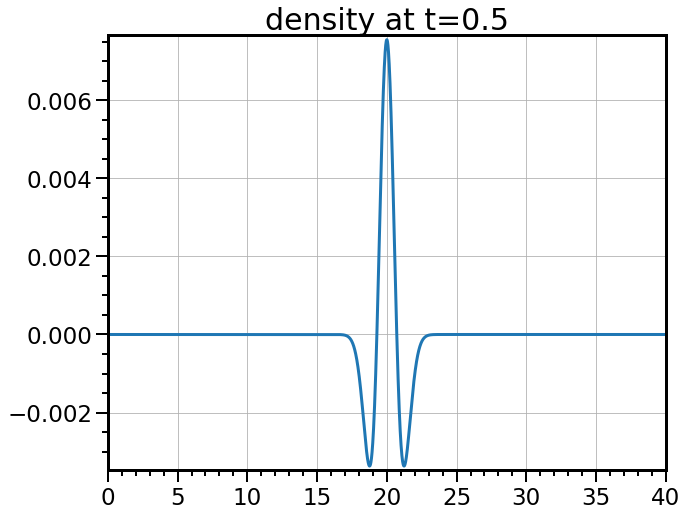

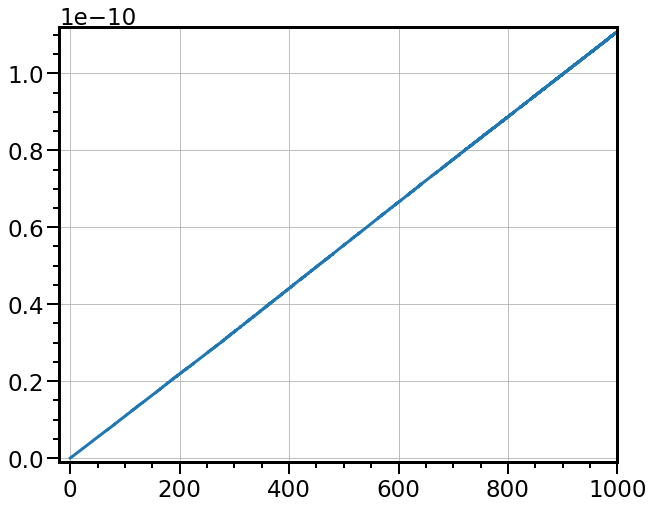

In [11]:
rho=h1.density-e1.density

t=np.asarray(grid.t.T)[:,0]
y=np.asarray(grid.y)[:,0]

fig,ax=plt.subplots(figsize=(10,8))
ax.plot(y,rho[:,50])
ax.set_title('density at t='+str(grid.t[0,10]))

print(np.asarray(np.sum(rho,axis=0).T)[:,0].shape)

fig,ax=plt.subplots(figsize=(10,8))
ax.plot(t,np.asarray(np.sum(rho,axis=0).T)[:,0])
ax.set_xlim(-20,)

plt.show()